# Description and Software Disclaimer

Title: Demonstration of Data Operations for Scanning Isotherms in "The Thermodynamics and Hysteresis of Adsorption" by A. J. Brown

Software Description: This notebook demonstrates data ingest and processing scripts for data provided in <ins>Digitization and Processing of Adsorption Isotherms from "The Thermodynamics and Hysteresis of Adsorption" by A. J. Brown, PhD Dissertation, University of Bristol (UK), 1963</ins>.

Author: Daniel W. Siderius, PhD

------------VERSION HISTORY----------------
<br>
<br>2021-03-04:   v 1.0 (initial release)

------------SOFTWARE DISCLAIMER AND REDISTRIBUTION CONDITIONS----------------

This software was developed at the National Institute of Standards and Technology by employees of the Federal Government in the course of their official duties. Pursuant to Title 17 Section 105 of the United States Code this software is not subject to copyright protection and is in the public domain. This software is an experimental system. NIST assumes no responsibility whatsoever for its use by other parties, and makes no guarantees, expressed or implied, about its quality, reliability, or any other characteristic. We would appreciate acknowledgement if the software is used.

This software can be redistributed and/or modified freely provided that any derivative works bear some notice that they are derived from it, and any modified versions bear some notice that they have been modified.

------------DECLARATION OF CONFLICTING INTERESTS----------------

Certain commercially available items may be identified in this paper. This identification does not imply recommendation by NIST, nor does it imply that it is the best available for the purposes described.

## User Guide

### Preface
This notebook is a demonstration of interaction with adsorption/desorption isotherm data that was obtained from data tables in:

<ins>The Thermodynamics and Hysteresis of Adsorption</ins>
by A. J. Brown
PhD Dissertation, University of Bristol (UK), 1963

The data used in this demonstration is described in an article published by the National Institute of Standards and Technology (USA):

<ins>Digitization and Processing of Adsorption Isotherms from "The Thermodynamics and Hysteresis of Adsorption" by A. J. Brown, PhD Dissertation, University of Bristol (UK), 1963</ins>
by D. W. Siderius, _J Res NIST_, volume(issue):pages, 2021.  doi


### Usage
This notebook is intended to provide examples of how to read in the scanning isotherm data from the aforementioned dissertation by A. J. Brown and then process the data for plotting and analysis. In this data set, the term "boundary isotherm" is used to describe the equilibrium isotherm that is either (a) the only observable isotherm or (b) the "outer" isotherm composed of the lowest adsorption isotherm and the highest desorption isotherm; e.g., the isotherm traced by beginning a sorption sweep at zero pressure, proceeding to the maximum pressure, and then reversing back to zero pressure.. This is in contrast to the "scanning isotherms" that are measured by changing the sorption direction at a middle pressure, which then traces a path different from the "boundary isotherm."

The scanning isotherms provided by this dissertation are all for the adsorption of Xenon in a particular sample of Vycor Glass, at the temperature 151.00 K +/- 0.03 K.

The source data for the scanning isotherms is provided in a single flat CSV files stored in "Scanning_Isotherms;" the data columns are self-describing, but are described in more detail in the "tableschema.json" file in this repository. The scanning isotherm measurements are broken into a sequence of "runs" (identified by `run_id`) in which each measurement follows directly from the prior measurement, i.e., an unbroken chain. Within each run, there are a sequence of "segments" (identified by `segment_id`) for a particular adsorption (desorption) objective. Textual descriptions of each run and sequence are provided in the same CSV file. All pressures presented in this data are given relative to the saturation pressure of Xenon at the stated temperature of the run.

The remainder of this notebook is broken into sections:

1. Import Required Python Packages
   This step simply imports the generic Python packages required by the notebook
   
2. Import a custom Python Package
   Provides software written specifically for accessing and processing isotherm data in this repository

3. Ingest / processing scripts
   Demonstrates how to read the entire set of scanning isotherms into a single Pandas dataframe

4. Example Operation: Extract a single scan
   Demonstrates how to extract a single scanning isotherm (identified by `run_id` and `segment_id`) from the full dataframe.

5. Example Plot: The 151 K Boundary Isotherm

6. Example Plot: Primary Adsorption Scanning Isotherms

7. Example Plot: Primary Desorption Scanning Isotherms

8. Sequence of Reversals

9. Subsidiary Closed Loop A
   
### NOTE:
In developing the software tools in the `support_software` Python module, care has been taken to preserve the numerical precision of measurements presented in A. J. Brown's dissertation when those measurements are processed. Thus, in the initial data ingest step, all data fields are stored as strings so that significant figures are not dropped accidentally (e.g., Python will drop a trailing "0" in a floating-point number). Data conversions are done in the `significant_figures` function, which follows conventional rules for preserving significant figures during multiplication/division and logarithm/anti-logarithm operations.

## 1. Import Python Packages

In [1]:
#End User is responsible for installation of missing packages using an appropriate Python package manager

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import sys

plt.rcParams.update({'font.size': 16})
from matplotlib.ticker import FormatStrFormatter

## 2. Import Support Software (custom written for this data set)

In [2]:
sys.path.append("..") # assumes that the project-specific support scripts are one directory down
import support_software as SS

## 3. Read in all Scanning Isotherms

In [3]:
# Objective: Ingest the scanning isotherm data; use Pandas native CSV reader
# Follow-up steps: convert 'run_id' and 'segment_id' columns to integer type
#   -> this is necessary because the data is read as strings, to preserve
#      floating point digits

in_filename = '../Scanning_Isotherms/xe_scanning_isotherms.csv'
#in_filename += '.edited'

df = pd.read_csv(in_filename, keep_default_na=False, dtype=str)
df['run_id'] = df['run_id'].astype(int)
df['segment_id'] = df['segment_id'].astype(int)

## 4. Example Operation: Extract a single scan

In [4]:
# Objective: Extract a single scanning isotherm from the full data set
# Because scanning isotherms originate in the last point of the previous segment,
#  this function includes that preceding point in the scanning isotherm

# Syntax: SS.extract_scan(dataframe,run_id,segment_id,branch,bounds)
#   dataframe: the Pandas dataframe containing the scanning isotherms
#   run_id: the run identifier (>1)
#   segment_id: the segment identifier (>0)
#   branch: select a branch or branches (adsorption = 'A', desorption = 'D', both = 'AD'; default = 'AD')
#   bounds: limit the selection to a portion of the data, if desired  (sample: slice(0,-3); default = None)

scan = SS.extract_scan(df,1,3,branch='AD')
scan

,pressure,adsorption
0,0.6564,22.44
1,0.6460,22.04
2,0.6244,21.26
3,0.5988,20.22
4,0.5678,18.92
5,0.5520,18.24
6,0.5311,17.11
7,0.5160,16.43
8,0.4975,15.58
9,0.4712,14.44


## 5. Example Plot: The 151 K Boundary Isotherm

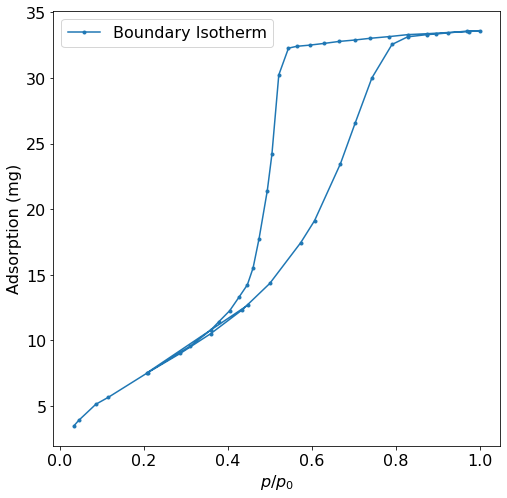

In [5]:
fig = plt.figure(figsize=(8,8))

# Boundary Isotherm
boundary = SS.extract_scan(df,1,0,'AD')
plt.plot(boundary['pressure'],boundary['adsorption'],'.-',label='Boundary Isotherm')

yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')


plt.legend()
plt.show()

## 6. Example Plot: Primary Adsorption Scanning Isotherms

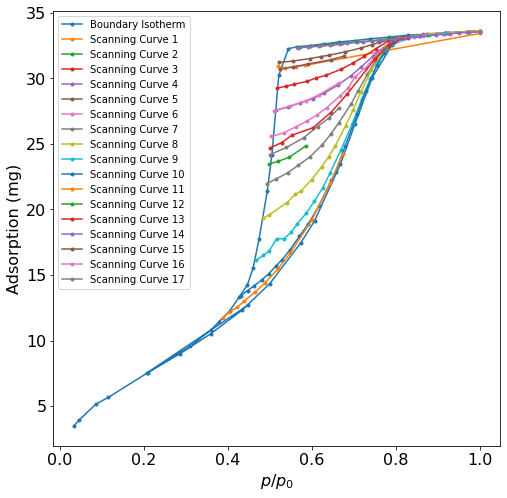

In [6]:
primary_ads_scanning = [
    {'run': 2, 'segment': 1, 'type': 'A', 'label': 'Scanning Curve 1'},
    {'run': 2, 'segment': 2, 'type': 'A', 'label': 'Scanning Curve 2'},
    {'run': 2, 'segment': 3, 'type': 'A', 'label': 'Scanning Curve 3'},
    {'run': 2, 'segment': 4, 'type': 'A', 'label': 'Scanning Curve 4'},
    {'run': 2, 'segment': 5, 'type': 'A', 'label': 'Scanning Curve 5'},
    {'run': 2, 'segment': 6, 'type': 'A', 'label': 'Scanning Curve 6'},
    {'run': 2, 'segment': 7, 'type': 'A', 'label': 'Scanning Curve 7'},
    {'run': 2, 'segment': 8, 'type': 'A', 'label': 'Scanning Curve 8'},
    {'run': 2, 'segment': 9, 'type': 'A', 'label': 'Scanning Curve 9'},
    {'run': 2, 'segment': 10, 'type': 'A', 'label': 'Scanning Curve 10'},
    {'run': 3, 'segment': 2, 'type': 'A', 'bounds': slice(0,-2), 'label': 'Scanning Curve 11'},
    {'run': 3, 'segment': 3, 'type': 'A', 'bounds': slice(0,-3), 'label': 'Scanning Curve 12'},
    {'run': 3, 'segment': 8, 'type': 'A', 'label': 'Scanning Curve 13'},
    {'run': 8, 'segment': 1, 'type': 'A', 'label': 'Scanning Curve 14'},
    {'run': 8, 'segment': 2, 'type': 'A', 'label': 'Scanning Curve 15'},
    {'run': 8, 'segment': 5, 'type': 'A', 'label': 'Scanning Curve 16'},
    {'run': 8, 'segment': 8, 'type': 'A', 'label': 'Scanning Curve 17'},
]

fig = plt.figure(figsize=(8,8))

# Boundary Isotherm
boundary = SS.extract_scan(df,1,0,'AD')
plt.plot(boundary['pressure'],boundary['adsorption'],'.-',label='Boundary Isotherm')

for segment in primary_ads_scanning:
    run_id = segment['run']
    segment_id = segment['segment']
    branch = segment['type']
    if 'bounds' in segment:
        bounds = segment['bounds']
    else:
        bounds = None
    # Extract the segment
    scan = SS.extract_scan(df,run_id,segment_id,branch=branch,bounds=bounds)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             #label=str(run_id)+'-'+str(segment_id)
             label=segment['label']
            )
    #print(segment)
    
yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')
    
plt.legend(prop={'size': 10})
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scanning Curve 3 29.26
Scanning Curve 5 31.22
Scanning Curve 6 25.57
Scanning Curve 7 21.96
Scanning Curve 9 16.11


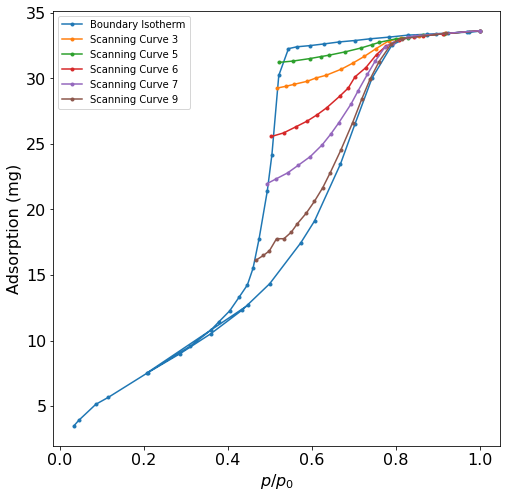

In [7]:
# Recreate Figure 15.2

primary_ads_scanning = [
    #{'run': 2, 'segment': 1, 'type': 'A', 'label': 'Scanning Curve 1'},
    #{'run': 2, 'segment': 2, 'type': 'A', 'label': 'Scanning Curve 2'},
    {'run': 2, 'segment': 3, 'type': 'A', 'label': 'Scanning Curve 3'},
    #{'run': 2, 'segment': 4, 'type': 'A', 'label': 'Scanning Curve 4'},
    {'run': 2, 'segment': 5, 'type': 'A', 'label': 'Scanning Curve 5'},
    {'run': 2, 'segment': 6, 'type': 'A', 'label': 'Scanning Curve 6'},
    {'run': 2, 'segment': 7, 'type': 'A', 'label': 'Scanning Curve 7'},
    #{'run': 2, 'segment': 8, 'type': 'A', 'label': 'Scanning Curve 8'},
    {'run': 2, 'segment': 9, 'type': 'A', 'label': 'Scanning Curve 9'},
    #{'run': 2, 'segment': 10, 'type': 'A', 'label': 'Scanning Curve 10'},
    #{'run': 3, 'segment': 2, 'type': 'A', 'bounds': slice(0,-2), 'label': 'Scanning Curve 11'},
    #{'run': 3, 'segment': 3, 'type': 'A', 'bounds': slice(0,-3), 'label': 'Scanning Curve 12'},
    #{'run': 3, 'segment': 8, 'type': 'A', 'label': 'Scanning Curve 13'},
    #{'run': 8, 'segment': 1, 'type': 'A', 'label': 'Scanning Curve 14'},
    #{'run': 8, 'segment': 2, 'type': 'A', 'label': 'Scanning Curve 15'},
    #{'run': 8, 'segment': 5, 'type': 'A', 'label': 'Scanning Curve 16'},
    #{'run': 8, 'segment': 8, 'type': 'A', 'label': 'Scanning Curve 17'},
]

fig = plt.figure(figsize=(8,8))

# Boundary Isotherm
boundary = SS.extract_scan(df,1,0,'AD')
plt.plot(boundary['pressure'],boundary['adsorption'],'.-',label='Boundary Isotherm')

for segment in primary_ads_scanning:
    run_id = segment['run']
    segment_id = segment['segment']
    branch = segment['type']
    if 'bounds' in segment:
        bounds = segment['bounds']
    else:
        bounds = None
    # Extract the segment
    scan = SS.extract_scan(df,run_id,segment_id,branch=branch,bounds=bounds)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             #label=str(run_id)+'-'+str(segment_id)
             label=segment['label']
            )
    #print(segment)
    print(segment['label'], scan['adsorption'][0])
    
yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')
    
plt.legend(prop={'size': 10})
plt.savefig('ajb_fig15_2.eps',bbox_inches='tight')
plt.show()

## 7. Example Plot: Primary Desorption Scanning Isotherms

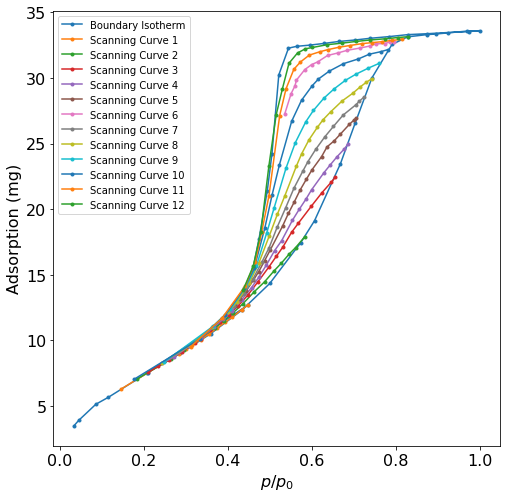

In [8]:
primary_des_scanning = [
    {'run': 1, 'segment': 1, 'type': 'D', 'label': 'Scanning Curve 1'},
    {'run': 1, 'segment': 2, 'type': 'D', 'label': 'Scanning Curve 2'},
    {'run': 1, 'segment': 3, 'type': 'D', 'label': 'Scanning Curve 3'},
    {'run': 1, 'segment': 4, 'type': 'D', 'label': 'Scanning Curve 4'},
    {'run': 1, 'segment': 5, 'type': 'D', 'label': 'Scanning Curve 5'},
    {'run': 2, 'segment': 11, 'type': 'D', 'label': 'Scanning Curve 6'},
    {'run': 3, 'segment': 1, 'type': 'D', 'label': 'Scanning Curve 7'},
    {'run': 3, 'segment': 4, 'type': 'D', 'label': 'Scanning Curve 8'},
    {'run': 3, 'segment': 5, 'type': 'D', 'label': 'Scanning Curve 9'},
    {'run': 3, 'segment': 6, 'type': 'D', 'label': 'Scanning Curve 10'},
    {'run': 3, 'segment': 7, 'type': 'D', 'label': 'Scanning Curve 11', 'bounds': slice(0,-2)},
    {'run': 3, 'segment': 9, 'type': 'D', 'label': 'Scanning Curve 12'}
]

fig = plt.figure(figsize=(8,8))

# Boundary Isotherm
boundary = SS.extract_scan(df,1,0,'AD')
plt.plot(boundary['pressure'],boundary['adsorption'],'.-',label='Boundary Isotherm')

for segment in primary_des_scanning:
    run_id = segment['run']
    segment_id = segment['segment']
    branch = segment['type']
    if 'bounds' in segment:
        bounds = segment['bounds']
    else:
        bounds = None
    # Extract the segment
    scan = SS.extract_scan(df,run_id,segment_id,branch=branch,bounds=bounds)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             #label=str(run_id)+'-'+str(segment_id)
             label=segment['label']
            )
    #print(segment)
    
yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')
    
plt.legend(prop={'size': 10})
plt.show()

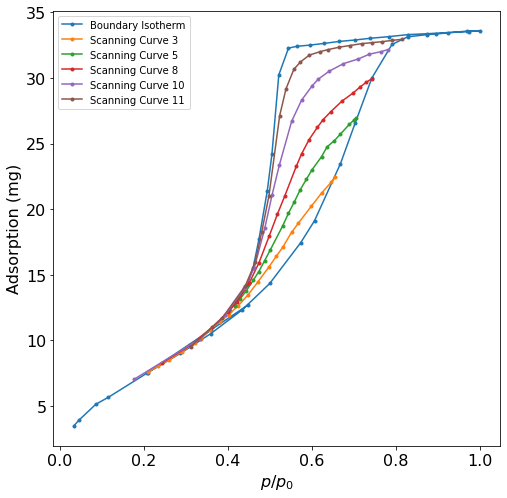

In [9]:
# Recreate Figure 15.3

primary_des_scanning = [
    #{'run': 1, 'segment': 1, 'type': 'D', 'label': 'Scanning Curve 1'},
    #{'run': 1, 'segment': 2, 'type': 'D', 'label': 'Scanning Curve 2'},
    {'run': 1, 'segment': 3, 'type': 'D', 'label': 'Scanning Curve 3'},
    #{'run': 1, 'segment': 4, 'type': 'D', 'label': 'Scanning Curve 4'},
    {'run': 1, 'segment': 5, 'type': 'D', 'label': 'Scanning Curve 5'},
    #{'run': 2, 'segment': 11, 'type': 'D', 'label': 'Scanning Curve 6'},
    #{'run': 3, 'segment': 1, 'type': 'D', 'label': 'Scanning Curve 7'},
    {'run': 3, 'segment': 4, 'type': 'D', 'label': 'Scanning Curve 8'},
    #{'run': 3, 'segment': 5, 'type': 'D', 'label': 'Scanning Curve 9'},
    {'run': 3, 'segment': 6, 'type': 'D', 'label': 'Scanning Curve 10'},
    {'run': 3, 'segment': 7, 'type': 'D', 'label': 'Scanning Curve 11', 'bounds': slice(0,-2)},
    #{'run': 3, 'segment': 9, 'type': 'D', 'label': 'Scanning Curve 12'}
]

fig = plt.figure(figsize=(8,8))

# Boundary Isotherm
boundary = SS.extract_scan(df,1,0,'AD')
plt.plot(boundary['pressure'],boundary['adsorption'],'.-',label='Boundary Isotherm')

for segment in primary_des_scanning:
    run_id = segment['run']
    segment_id = segment['segment']
    branch = segment['type']
    if 'bounds' in segment:
        bounds = segment['bounds']
    else:
        bounds = None
    # Extract the segment
    scan = SS.extract_scan(df,run_id,segment_id,branch=branch,bounds=bounds)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             #label=str(run_id)+'-'+str(segment_id)
             label=segment['label']
            )
    #print(segment)
    
yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')
    
plt.legend(prop={'size': 10})
plt.show()

## 8. Sequence of Reversals

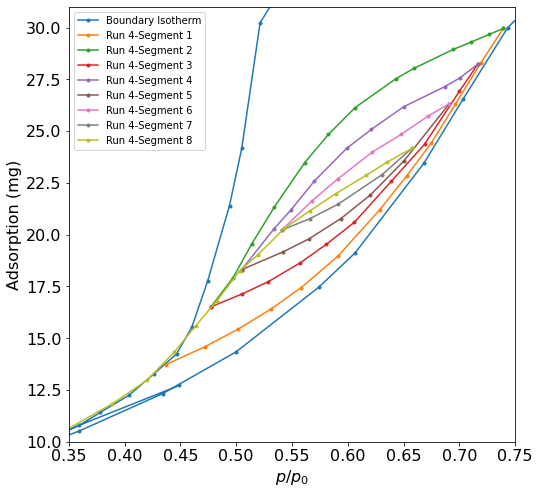

In [10]:
# Recreate Figure 15.25
# Series of Reversals Within the Hystersis Loop starting and Finishing on the Desorption Boundary Curve

# Description in Fig 15.25: Series of Reversals followed by desorption through lower reversal points


reversals1 = [
    {'run': 4, 'segment': 1, 'type': 'A'},
    {'run': 4, 'segment': 2, 'type': 'D'},
    {'run': 4, 'segment': 3, 'type': 'A'},
    {'run': 4, 'segment': 4, 'type': 'D'},
    {'run': 4, 'segment': 5, 'type': 'A'},
    {'run': 4, 'segment': 6, 'type': 'D'},
    {'run': 4, 'segment': 7, 'type': 'A'},
    {'run': 4, 'segment': 8, 'type': 'D'}
]

fig = plt.figure(figsize=(8,8))

## Boundary Isotherm
boundary = SS.extract_scan(df,1,0,'AD')
plt.plot(boundary['pressure'],boundary['adsorption'],'.-',label='Boundary Isotherm')

for segment in reversals1:
    run_id = segment['run']
    segment_id = segment['segment']
    branch = segment['type']
    # Extract the segment
    scan = SS.extract_scan(df,run_id,segment_id,branch)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             label='Run '+str(run_id)+'-Segment '+str(segment_id)
            )
    #print(segment)
    
yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')
    
plt.legend(prop={'size': 10})

plt.axis([0.35,0.75,10,31])

plt.show()

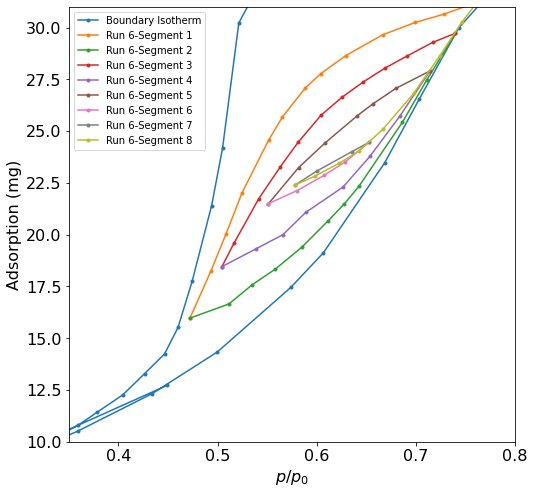

In [11]:
# Series of Reversals Within the Hystersis Loop starting and Finishing on the Adsorption Boundary Curve

reversals2 = [
    {'run': 6, 'segment': 1, 'type': 'D'},
    {'run': 6, 'segment': 2, 'type': 'A'},
    {'run': 6, 'segment': 3, 'type': 'D'},
    {'run': 6, 'segment': 4, 'type': 'A'},
    {'run': 6, 'segment': 5, 'type': 'D'},
    {'run': 6, 'segment': 6, 'type': 'A'},
    {'run': 6, 'segment': 7, 'type': 'D'},
    {'run': 6, 'segment': 8, 'type': 'A'}
]

fig = plt.figure(figsize=(8,8))

## Boundary Isotherm
boundary = SS.extract_scan(df,1,0,'AD')
plt.plot(boundary['pressure'],boundary['adsorption'],'.-',label='Boundary Isotherm')

for segment in reversals2:
    run_id = segment['run']
    segment_id = segment['segment']
    branch = segment['type']
    # Extract the segment
    scan = SS.extract_scan(df,run_id,segment_id,branch)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             label='Run '+str(run_id)+'-Segment '+str(segment_id)
            )
    #print(segment)
    
yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')
    
plt.legend(prop={'size': 10})

plt.axis([0.35,0.80,10,31])

plt.show()

## 9. Subsidiary Closed Loop A

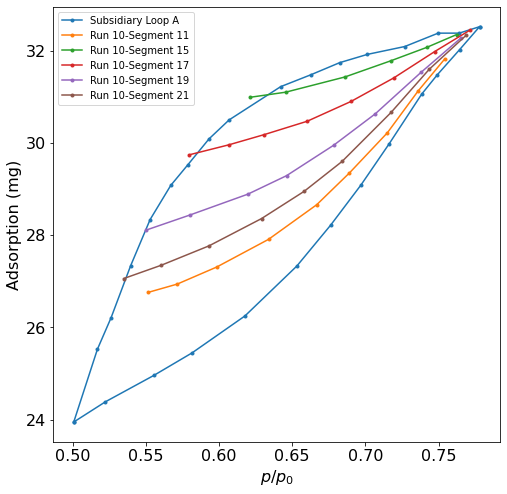

In [12]:
# Subsidiary Closed Loop A
#  Bounds (per Fig 15.1):  (0.518, 25.5) - (0.779, 32.6)


fig = plt.figure(figsize=(8,8))

# Set up the outer loop
outer_loop_A = [
    {'run': 10, 'segment': 1, 'type': 'AD'},
    {'run': 10, 'segment': 2, 'type': 'AD'}
]

lower_boundary = SS.extract_scan(df,10,1,'AD')
upper_boundary = SS.extract_scan(df,10,2,'AD')
outer_loop = pd.concat([lower_boundary,upper_boundary] , ignore_index=True)
outer_loop = outer_loop.append({'pressure': outer_loop['pressure'].iloc[0],
                   'adsorption': outer_loop['adsorption'].iloc[0]
                  }, ignore_index=True)
plt.plot(outer_loop['pressure'],outer_loop['adsorption'],'.-',
                 label='Subsidiary Loop A'
            )


# Adsorption Scanning Curves within Subsidiary Loop A
subsidiary_loop_A_ads = [
    {'run': 10, 'segment': 11, 'type': 'A'},
    #{'run': 10, 'segment': 13, 'type': 'A'},
    {'run': 10, 'segment': 15, 'type': 'A'},
    {'run': 10, 'segment': 17, 'type': 'A'},
    {'run': 10, 'segment': 19, 'type': 'A'},
    {'run': 10, 'segment': 21, 'type': 'A', 'bounds': slice(0,8)},
]

for segment in subsidiary_loop_A_ads:
    run_id = segment['run']
    segment_id = segment['segment']
    branch = segment['type']
    # Extract the segment
    if 'bounds' in segment:
        bounds = segment['bounds']
    else:
        bounds = None
    scan = SS.extract_scan(df,run_id,segment_id,branch,bounds)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             label='Run '+str(run_id)+'-Segment '+str(segment_id)
            )
    
yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')
    
plt.legend(prop={'size': 10})

#plt.axis([0.35,0.80,10,31])

plt.show()

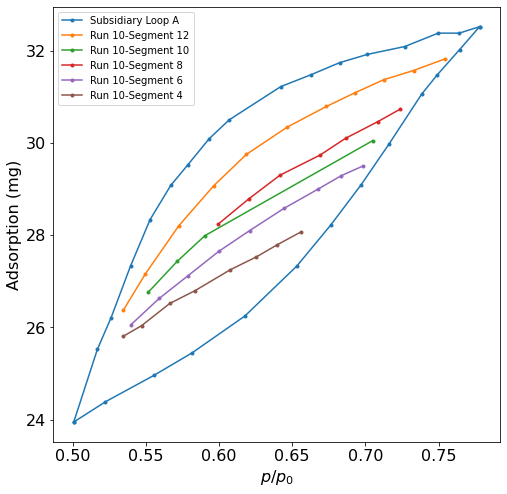

In [13]:
# Subsidiary Closed Loop A
#  Bounds (per Fig 15.1):  (0.518, 25.5) - (0.779, 32.6)


fig = plt.figure(figsize=(8,8))

# Set up the outer loop
outer_loop_A = [
    {'run': 10, 'segment': 1, 'type': 'AD'},
    {'run': 10, 'segment': 2, 'type': 'AD'}
]

lower_boundary = SS.extract_scan(df,10,1,'AD')
upper_boundary = SS.extract_scan(df,10,2,'AD')
outer_loop = pd.concat([lower_boundary,upper_boundary] , ignore_index=True)
outer_loop = outer_loop.append({'pressure': outer_loop['pressure'].iloc[0],
                   'adsorption': outer_loop['adsorption'].iloc[0]
                  }, ignore_index=True)
plt.plot(outer_loop['pressure'],outer_loop['adsorption'],'.-',
                 label='Subsidiary Loop A'
            )


# Desorption Scanning Curves within Subsidiary Loop A
subsidiary_loop_A_des = [
    {'run': 10, 'segment': 12, 'type': 'AD'},
    {'run': 10, 'segment': 10, 'type': 'AD'},
    {'run': 10, 'segment': 8, 'type': 'AD'},
    {'run': 10, 'segment': 6, 'type': 'AD'},
    #{'run': 10, 'segment': 16, 'type': 'AD'},
    #{'run': 10, 'segment': 14, 'type': 'AD'},
    {'run': 10, 'segment': 4, 'type': 'AD'},
]

for segment in subsidiary_loop_A_des:
    run_id = segment['run']
    segment_id = segment['segment']
    branch = segment['type']
    # Extract the segment
    scan = SS.extract_scan(df,run_id,segment_id,branch)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             label='Run '+str(run_id)+'-Segment '+str(segment_id)
            )

for segment_id in range(10,10):
    run_id = 10
    branch = 'AD'
    # Extract the segment
    scan = SS.extract_scan(df,run_id,segment_id,branch)
    plt.plot(scan['pressure'],scan['adsorption'],'.-',
             label='Run '+str(run_id)+'-Segment '+str(segment_id)
            )
    #print(segment)
    
yunits = df['adsorption_units'][0]
xunits = df['pressure_units'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')
    
plt.legend(prop={'size': 10})

#plt.axis([0.35,0.80,10,31])

plt.show()